In [2]:
import pandas as pd

df = pd.read_csv('e_commerce.csv')

In [3]:
# 删除Description为空且单价为0的记录
df = df.drop(df[(df["Description"].isnull()) & (df["UnitPrice"] == 0)].index)

# 将CustomerID列转换为字符串类型
df['CustomerID'] = df['CustomerID'].astype(str)

# 将InvoiceDate列转换为日期时间格式
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 对于Quantity小于0的记录，检查是否是取消订单（InvoiceNo以C开头），如果是，则保留；否则，删除
df = df[~((df['Quantity'] < 0) & (~df['InvoiceNo'].str.startswith('C')))]

# 显示清理后的数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539981 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539981 non-null  object        
 1   StockCode    539981 non-null  object        
 2   Description  539981 non-null  object        
 3   Quantity     539981 non-null  int64         
 4   InvoiceDate  539981 non-null  datetime64[ns]
 5   UnitPrice    539981 non-null  float64       
 6   CustomerID   539981 non-null  object        
 7   Country      539981 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.1+ MB


D:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


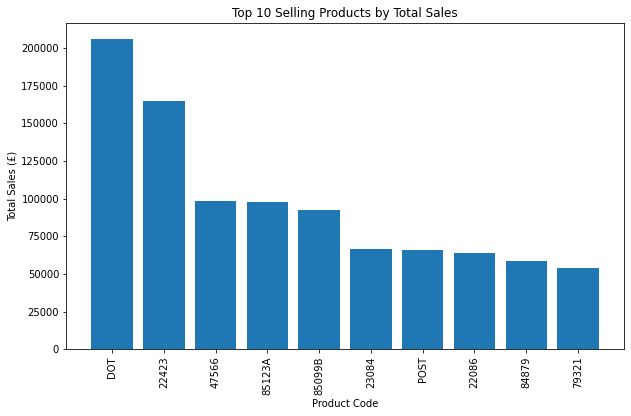

     StockCode  TotalSales
3930       DOT   206245.48
1313     22423   164762.19
2678     47566    98302.98
3424    85123A    97894.50
3404    85099B    92356.03
1946     23084    66756.59
3933      POST    66230.64
1009     22086    63791.94
3205     84879    58959.73
2854     79321    53768.06


In [4]:
# 计算每个产品的总销售额
sales_by_product = df.groupby('StockCode')['Quantity', 'UnitPrice'].apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).reset_index(name='TotalSales')

# 按销售额降序排列
top_selling_products = sales_by_product.sort_values(by='TotalSales', ascending=False).head(10)

# 可视化畅销产品
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_selling_products['StockCode'], top_selling_products['TotalSales'])
plt.xlabel('Product Code')
plt.ylabel('Total Sales (£)')
plt.title('Top 10 Selling Products by Total Sales')
plt.xticks(rotation=90)
plt.show()

# 打印出前10个畅销产品及其销售额
print(top_selling_products)